# K-Neariest-Neighbour

## KNN with  iris dataset

In [1]:
from sklearn.datasets import load_iris

X,y = load_iris().data,load_iris().target

In [2]:
X.shape,y.shape

((150, 4), (150,))

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import matplotlib.pyplot as plt

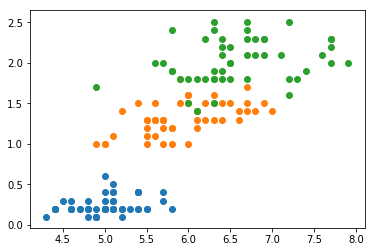

In [5]:
setosa =X[y == 0]
versicolor =X[y == 1]
verginica = X[y ==2]
plt.scatter(setosa[:,0],setosa[:,3])
plt.scatter(versicolor[:,0],versicolor[:,3])
plt.scatter(verginica[:,0],verginica[:,3])

### train test split of data

In [6]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y)

In [7]:
for i in (X_train,X_test,y_train,y_test):
    print(i.shape)

(112, 4)
(38, 4)
(112,)
(38,)


### import KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=5)

### fitting or training our model with training dataset

In [9]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
knn_model.predict(X_test[10:30])

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2])

In [11]:
y_test[10:30]

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2])

In [12]:
predicted =knn_model.predict(X_test)
actual = y_test
count =0
for i,j in zip(predicted,actual):
    if i!=j:
        count =count+1
print("percentage error is:",(count/len(actual))*100)

percentage error is: 2.631578947368421


In [13]:
knn_model.score(X_test,y_test)

0.9736842105263158

# logistic VS KNN

In [14]:
from sklearn.datasets import load_digits

In [15]:
x =load_digits().data
y = load_digits().target

In [16]:
x.shape,y.shape

((1797, 64), (1797,))

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
x=np.random.normal(size = 300)
y = -x**2 + np.random.normal(0,.3,size =300)

x_new = x.reshape(300,-1)
new_data = np.concatenate((x_new,x_new**2),axis = 1)

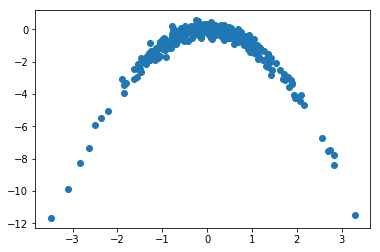

In [20]:
plt.scatter(x.reshape(300),y)

In [21]:
from sklearn.linear_model import LinearRegression
model =  LinearRegression()

In [22]:
model.fit(new_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

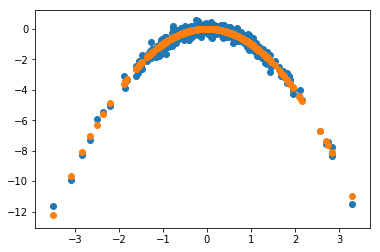

In [23]:
predicted_values = model.predict(new_data)
plt.scatter(x,y)
plt.scatter(x,predicted_values)

# KMeans Clustering

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint


In [25]:
def plot_cluster(cluster):

    for one_cluster in cluster:
        x = one_cluster
        y = [ 0  for i in one_cluster ]
        y[0] = 1

        plt.scatter(x, y)

    plt.show()


In [26]:
def random_centroid(k):

    cluster = [ [] for i in range(k) ]

    for i in range(k):

        cluster[i].append( randint( min(data) , max(data) ) )

    print("First random centroids : ", cluster)
    return cluster

#to calculate distance
def distance(centroid, point):

    return abs(centroid - point)


In [27]:
#to calculate lowest distance for finding cluster
def find_index_of_min(li):

    lowest_index = 0
    lowest_value = li[0]

    for i in range(len(li)):

        if li[i] < lowest_value:
            lowest_value = li[i]
            lowest_index = i

    return lowest_index


In [28]:
#for updating cluster
def new_cluster(data, cluster):

    cluster = [ [ cluster[0][0] ], [ cluster[1][0] ], [ cluster[2][0] ] ]

    for point in data:

        distance_from_centroid = []
        for one_cluster in cluster:

            centroid = one_cluster[0]
            

            distance_from_centroid.append( distance(centroid, point) )
        #appending point to that cluster for which lowest distance was found
        point_in_cluster = find_index_of_min(distance_from_centroid)
        cluster[ point_in_cluster ].append( point )

    print("Whole cluster : ", cluster)
    plot_cluster(cluster)
    return cluster


In [29]:
def new_centroid(cluster):

    for i in range(1 , len( cluster ) ):

        total = 0
        for j in cluster[i]:
            total = total + j

        mean = total / len( cluster[i] )
        cluster[i][0] = mean

    print(cluster)
    plot_cluster(cluster)
    return cluster


First random centroids :  [[40], [13], [4]]
Whole cluster :  [[40, 29, 32, 40, 28], [13, 14, 14, 12, 17, 19, 17, 13, 15], [4, 5, 8, 6, 2, 3, 8]]


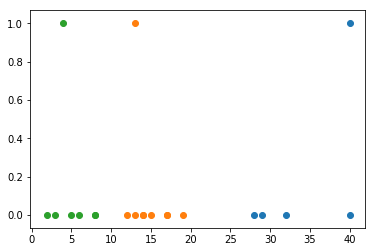

[[40, 29, 32, 40, 28], [14.88888888888889, 14, 14, 12, 17, 19, 17, 13, 15], [5.142857142857143, 5, 8, 6, 2, 3, 8]]


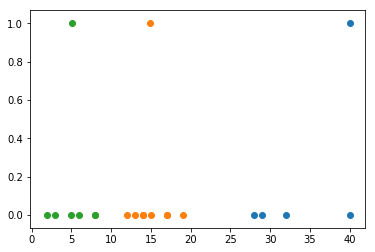

Whole cluster :  [[40, 29, 32, 40, 28], [14.88888888888889, 14, 14, 12, 17, 19, 17, 13, 15], [5.142857142857143, 5, 8, 6, 2, 3, 8]]


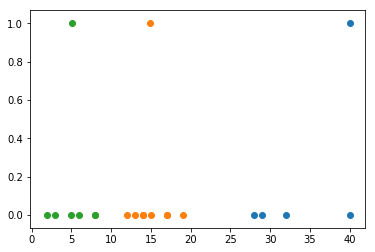

[[40, 29, 32, 40, 28], [15.098765432098766, 14, 14, 12, 17, 19, 17, 13, 15], [5.3061224489795915, 5, 8, 6, 2, 3, 8]]


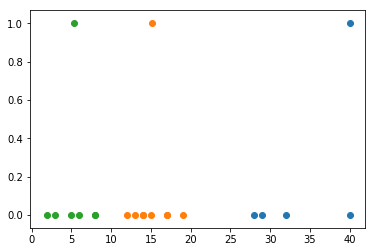

Whole cluster :  [[40, 29, 32, 40, 28], [15.098765432098766, 14, 14, 12, 17, 19, 17, 13, 15], [5.3061224489795915, 5, 8, 6, 2, 3, 8]]


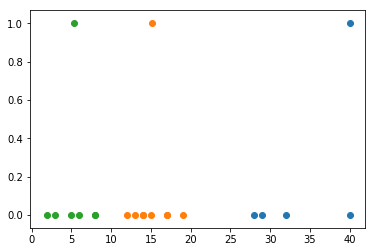

[[40, 29, 32, 40, 28], [15.122085048010973, 14, 14, 12, 17, 19, 17, 13, 15], [5.329446064139942, 5, 8, 6, 2, 3, 8]]


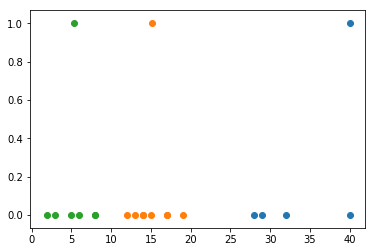

Whole cluster :  [[40, 29, 32, 40, 28], [15.122085048010973, 14, 14, 12, 17, 19, 17, 13, 15], [5.329446064139942, 5, 8, 6, 2, 3, 8]]


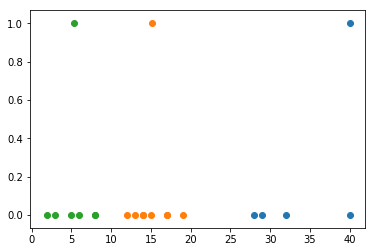

[[40, 29, 32, 40, 28], [15.124676116445663, 14, 14, 12, 17, 19, 17, 13, 15], [5.332778009162849, 5, 8, 6, 2, 3, 8]]


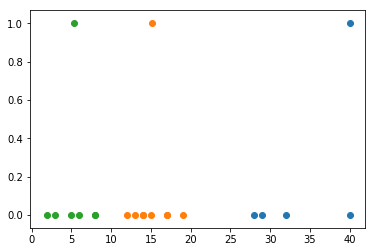

Whole cluster :  [[40, 29, 32, 40, 28], [15.124676116445663, 14, 14, 12, 17, 19, 17, 13, 15], [5.332778009162849, 5, 8, 6, 2, 3, 8]]


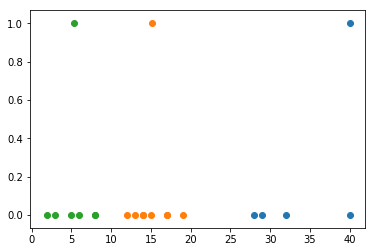

[[40, 29, 32, 40, 28], [15.124964012938408, 14, 14, 12, 17, 19, 17, 13, 15], [5.333254001308979, 5, 8, 6, 2, 3, 8]]


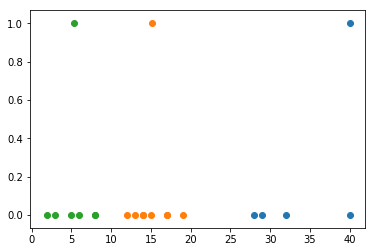

Whole cluster :  [[40, 29, 32, 40, 28], [15.124964012938408, 14, 14, 12, 17, 19, 17, 13, 15], [5.333254001308979, 5, 8, 6, 2, 3, 8]]


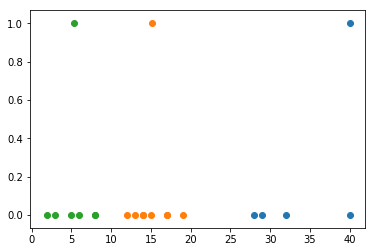

[[40, 29, 32, 40, 28], [15.1249960014376, 14, 14, 12, 17, 19, 17, 13, 15], [5.333322000186997, 5, 8, 6, 2, 3, 8]]


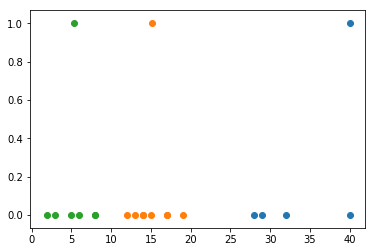

Whole cluster :  [[40, 29, 32, 40, 28], [15.1249960014376, 14, 14, 12, 17, 19, 17, 13, 15], [5.333322000186997, 5, 8, 6, 2, 3, 8]]


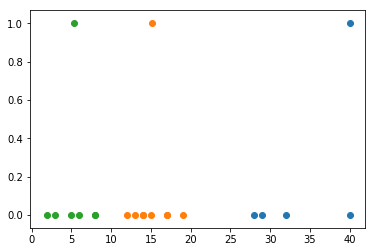

[[40, 29, 32, 40, 28], [15.12499955571529, 14, 14, 12, 17, 19, 17, 13, 15], [5.333331714312428, 5, 8, 6, 2, 3, 8]]


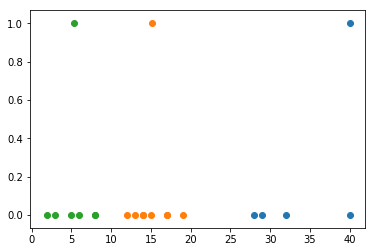

Whole cluster :  [[40, 29, 32, 40, 28], [15.12499955571529, 14, 14, 12, 17, 19, 17, 13, 15], [5.333331714312428, 5, 8, 6, 2, 3, 8]]


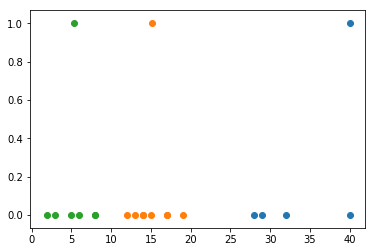

[[40, 29, 32, 40, 28], [15.124999950635035, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333102044633, 5, 8, 6, 2, 3, 8]]


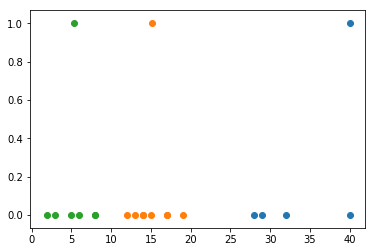

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999950635035, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333102044633, 5, 8, 6, 2, 3, 8]]


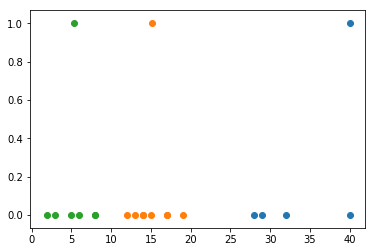

[[40, 29, 32, 40, 28], [15.124999994515004, 14, 14, 12, 17, 19, 17, 13, 15], [5.33333330029209, 5, 8, 6, 2, 3, 8]]


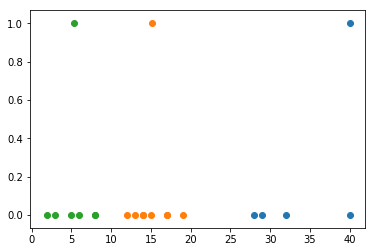

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999994515004, 14, 14, 12, 17, 19, 17, 13, 15], [5.33333330029209, 5, 8, 6, 2, 3, 8]]


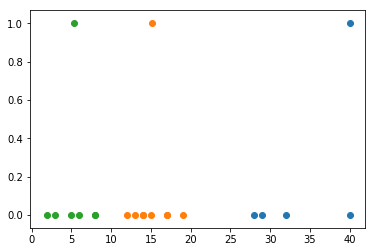

[[40, 29, 32, 40, 28], [15.124999999390557, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333328613156, 5, 8, 6, 2, 3, 8]]


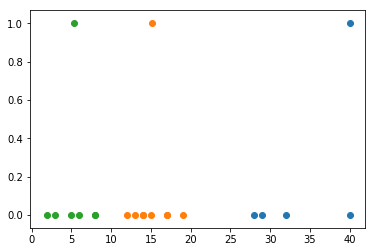

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999390557, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333328613156, 5, 8, 6, 2, 3, 8]]


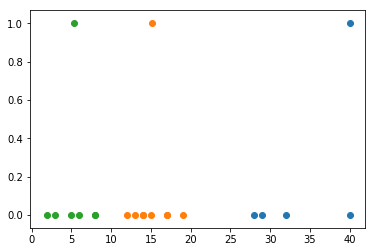

[[40, 29, 32, 40, 28], [15.124999999932284, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333332659023, 5, 8, 6, 2, 3, 8]]


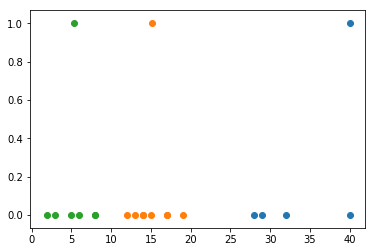

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999932284, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333332659023, 5, 8, 6, 2, 3, 8]]


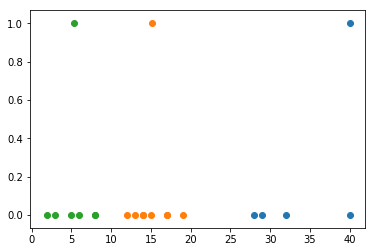

[[40, 29, 32, 40, 28], [15.124999999992477, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333237003, 5, 8, 6, 2, 3, 8]]


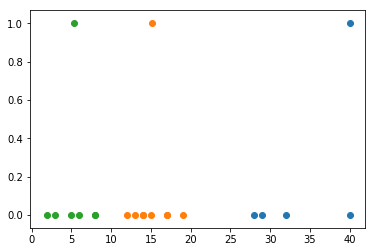

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999992477, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333237003, 5, 8, 6, 2, 3, 8]]


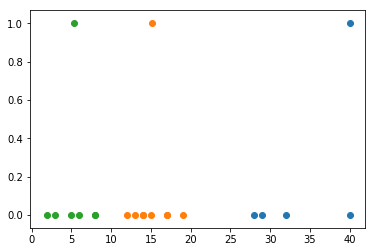

[[40, 29, 32, 40, 28], [15.124999999999163, 14, 14, 12, 17, 19, 17, 13, 15], [5.3333333333195725, 5, 8, 6, 2, 3, 8]]


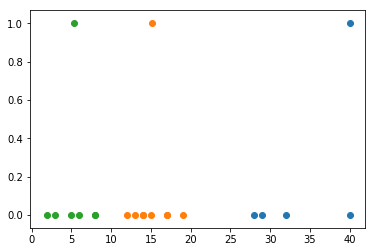

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999999163, 14, 14, 12, 17, 19, 17, 13, 15], [5.3333333333195725, 5, 8, 6, 2, 3, 8]]


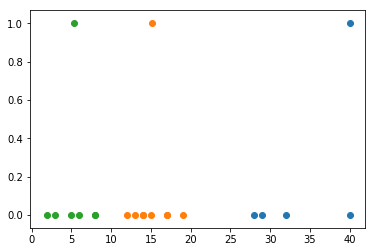

[[40, 29, 32, 40, 28], [15.124999999999906, 14, 14, 12, 17, 19, 17, 13, 15], [5.3333333333313675, 5, 8, 6, 2, 3, 8]]


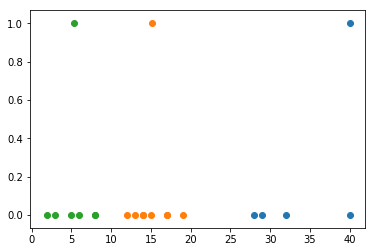

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999999906, 14, 14, 12, 17, 19, 17, 13, 15], [5.3333333333313675, 5, 8, 6, 2, 3, 8]]


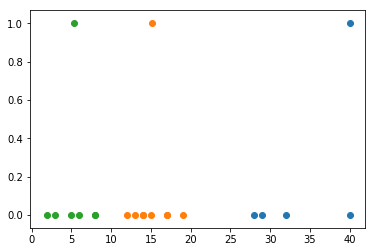

[[40, 29, 32, 40, 28], [15.124999999999991, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333052, 5, 8, 6, 2, 3, 8]]


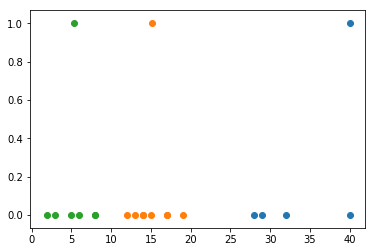

Whole cluster :  [[40, 29, 32, 40, 28], [15.124999999999991, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333052, 5, 8, 6, 2, 3, 8]]


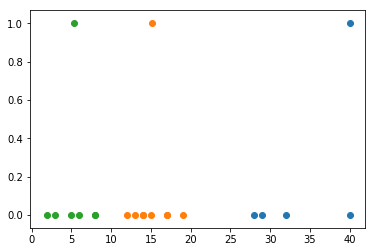

[[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333293, 5, 8, 6, 2, 3, 8]]


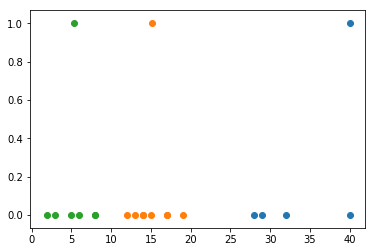

Whole cluster :  [[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333293, 5, 8, 6, 2, 3, 8]]


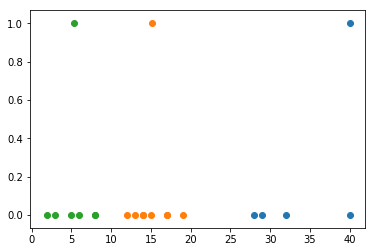

[[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333328, 5, 8, 6, 2, 3, 8]]


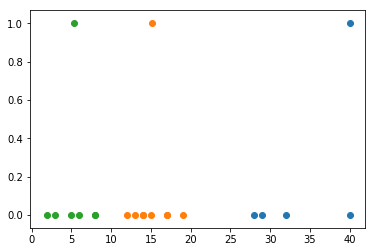

Whole cluster :  [[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333328, 5, 8, 6, 2, 3, 8]]


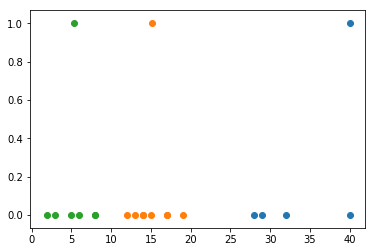

[[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


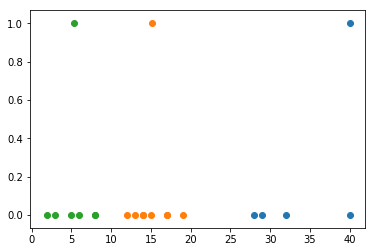

Whole cluster :  [[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


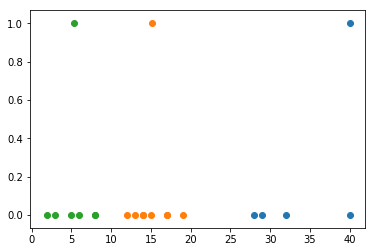

[[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


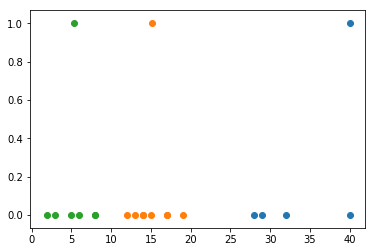

Whole cluster :  [[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


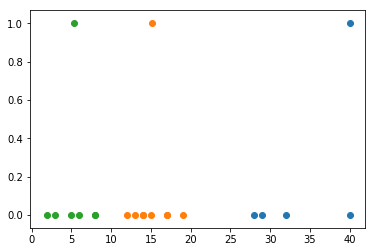

[[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


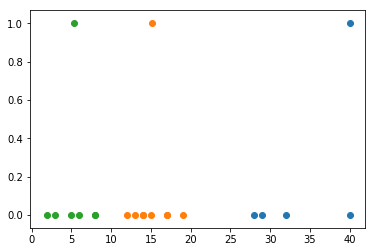

Whole cluster :  [[40, 29, 32, 40, 28], [15.125, 14, 14, 12, 17, 19, 17, 13, 15], [5.333333333333333, 5, 8, 6, 2, 3, 8]]


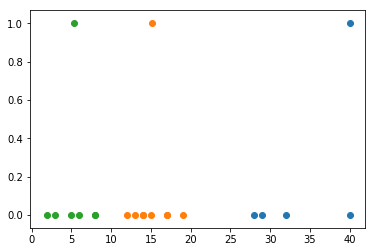

In [30]:
data = [5, 14, 29, 8, 6, 2, 14, 12, 32, 17, 40, 19, 3, 17, 13, 8, 15, 28]

k    = 3

cluster = random_centroid(k)
cluster = new_cluster(data, cluster)


for i in range(20):

    cluster = new_centroid(cluster)
    cluster = new_cluster(data, cluster)


# Naiev Bayes Classifier

In [31]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [32]:
iris = datasets.load_iris()

In [33]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [34]:
X=iris.data
y=iris.target

In [35]:
X.shape

(150, 4)

In [36]:
y.shape

(150,)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [38]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

In [39]:
nv.fit(X_train,y_train)

GaussianNB(priors=None)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
y_pred = nv.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        30



# Decision Tree


In [45]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

#load data and store it into pandas dataframe objects
iris = load_iris()
X = iris.data
y = iris.target






C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axi

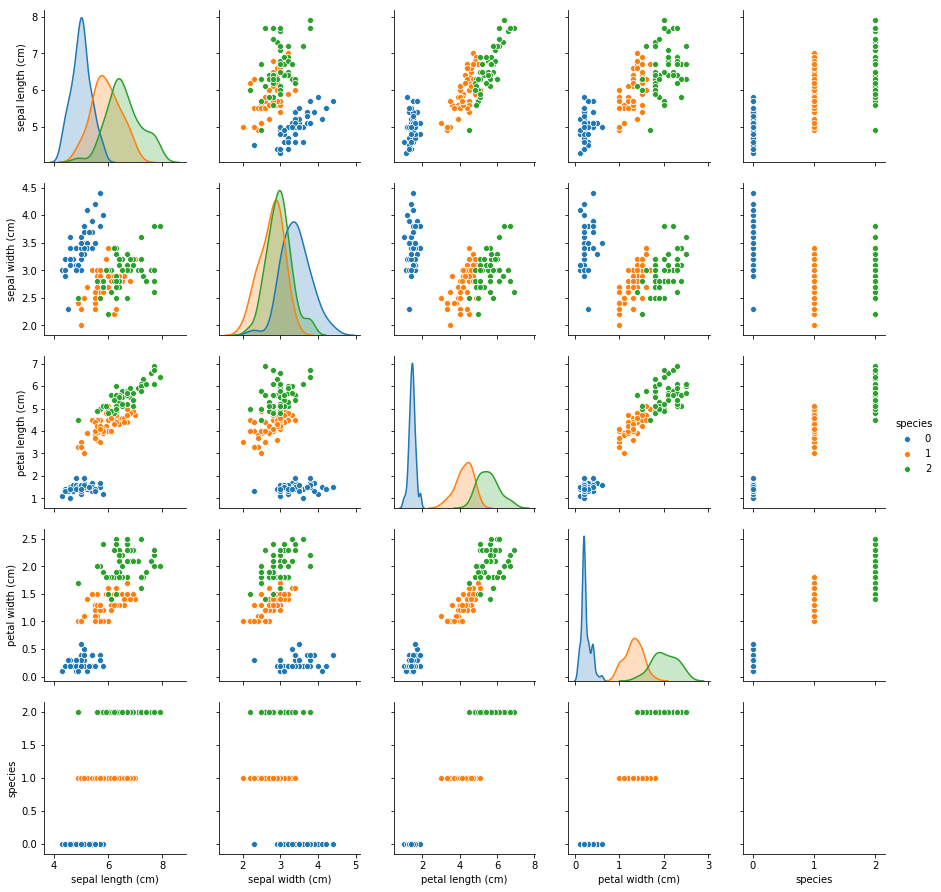

In [46]:
import seaborn as sns
data = pd.DataFrame(X,columns = iris.feature_names)
data["species"]=y

sns.pairplot(data,hue="species")

In [47]:
#defining and fitting a decisiontreeclassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
from sklearn.tree import export_graphviz



export_graphviz(
              tree,
              out_file = "iris-graph.dot",
              feature_names = list(data.columns)[:-1],
              class_names = iris.target_names,
              filled=True,
              rounded = True)

In [49]:
!cat iris-graph.dot

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
from sklearn.datasets import load_digits
digits =load_digits()
X=digits.data
y = digits.target

#defining and fitting a decisiontreeclasssifier instance
tree = DecisionTreeClassifier(max_depth =2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
tree.score(X,y)

0.31886477462437396

# Random Forest


In [52]:
# Pandas is used for data manipulation
import pandas as pd



In [53]:
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


## identifying anomalies/missing data

In [54]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [55]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)



In [56]:
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)


,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [57]:
# Use numpy to convert to arrays
import numpy as np



In [58]:
# Labels are the values we want to predict
labels = np.array(features['actual'])

In [59]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

In [60]:
# Saving feature names for later use
feature_list = list(features.columns)

In [61]:
# Convert to numpy array
features = np.array(features)


##  training and testing sets

In [62]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [63]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [64]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


## establish baseline

In [65]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]


In [66]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)


In [67]:
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


## train model

In [68]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [69]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [70]:
# Train the model on training data
rf.fit(train_features, train_labels);


## make prediction on test set

In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)



In [72]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)


In [73]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.87 degrees.


## determine performance metrices

In [74]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)


In [75]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.94 %.


## variable importances

In [76]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [77]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]


In [78]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [79]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [80]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)


In [81]:
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]


In [82]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [83]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

In [84]:
errors = abs(predictions - test_labels)


In [85]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.91 degrees.


In [86]:
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape


In [87]:
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.78 %.


## visualisation

In [88]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt


In [89]:
%matplotlib inline

In [90]:
# Set the style
plt.style.use('fivethirtyeight')

In [91]:
# list of x locations for plotting
x_values = list(range(len(importances)))


<BarContainer object of 17 artists>

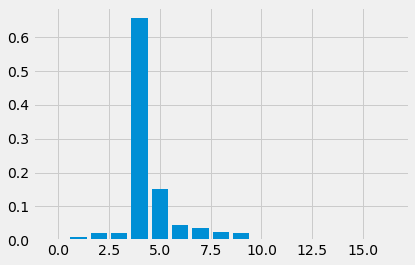

In [92]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')


In [93]:
# Use datetime for creating date objects for plotting
import datetime


In [94]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

In [95]:
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]


In [96]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})


In [97]:
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]


In [98]:
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]


In [99]:
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]


In [100]:
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


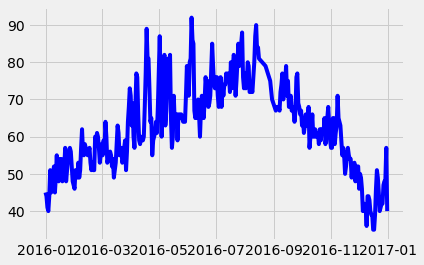

In [101]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')


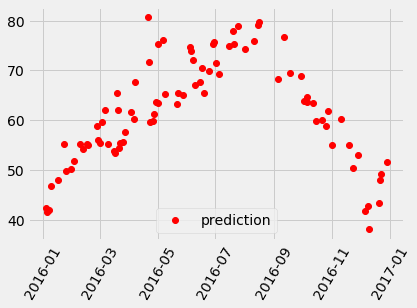

In [102]:
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()


In [103]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

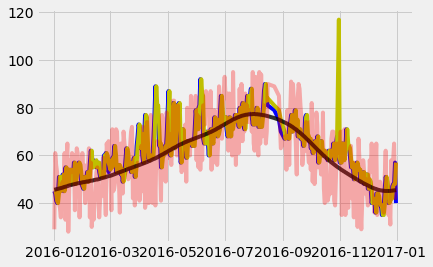

In [104]:
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)


# Linear Regression

In [105]:
from sklearn.datasets import load_boston
d = load_boston()

In [106]:
import pandas as pd
data = pd.DataFrame(d.data, columns=d.feature_names)

In [107]:
data["MEDV"] = d.target

In [108]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [109]:
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## separting features into X and target into Y

In [110]:
X = data[[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT' ]]
y=data[ "MEDV" ]

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)
y_test.head()

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
Name: MEDV, dtype: float64

In [112]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.head())
    print("_"*40)

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
469  13.07510  0.0  18.10   0.0  0.580  5.713   56.7  2.8237  24.0  666.0   
141   1.62864  0.0  21.89   0.0  0.624  5.019  100.0  1.4394   4.0  437.0   
454   9.51363  0.0  18.10   0.0  0.713  6.728   94.1  2.4961  24.0  666.0   
426  12.24720  0.0  18.10   0.0  0.584  5.837   59.7  1.9976  24.0  666.0   
362   3.67822  0.0  18.10   0.0  0.770  5.362   96.2  2.1036  24.0  666.0   

     PTRATIO       B  LSTAT  
469     20.2  396.90  14.76  
141     21.2  396.90  34.41  
454     20.2    6.68  18.71  
426     20.2   24.65  15.69  
362     20.2  380.79  10.19  
________________________________________
         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
357   3.84970  0.0  18.10   1.0  0.770  6.395   91.0  2.5052  24.0  666.0   
337   0.03041  0.0   5.19   0.0  0.515  5.895   59.6  5.6150   5.0  224.0   
327   0.24103  0.0   7.38   0.0  0.493  6.083   43.7  5.4159   5.0  287.0   
13    0.

## importing linear regression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [117]:
model.coef_

array([-1.02757296e-01,  2.77621460e-02,  2.04653530e-02,  2.74957110e+00,
       -1.56295805e+01,  5.30722257e+00, -1.06414784e-02, -1.31219481e+00,
        2.54697507e-01, -1.06726435e-02, -9.63046492e-01,  1.20095041e-02,
       -3.87255876e-01])

In [118]:
data.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [119]:
actual = y_test.iloc[:10]
predicted = model.predict(X_test.iloc[:10])

In [120]:
for i, j in zip(actual, predicted):
    print(i, ":", j)

21.7 : 23.108035227079096
18.5 : 19.041319274459177
22.2 : 19.903532378123728
20.4 : 19.13944395501303
8.8 : 5.773213041833223
8.3 : 12.406923530462395
21.4 : 21.56289733280717
23.6 : 28.785142473955762
23.5 : 29.08053290751161
19.0 : 13.460805703180311


In [121]:
from math import sqrt

In [122]:
actual = y_test.iloc[:]
predicted = model.predict(X_test.iloc[:])

sum_of_squared_error = 0
for i,j in zip(actual,predicted):
    error = i-j
    squared_error = error**2
    
    sum_of_squared_error = sum_of_squared_error +squared_error
mean_squared_error = sum_of_squared_error/len(actual)
root_mean_squared_error = sqrt(mean_squared_error)
print(root_mean_squared_error)

5.074238144235827


## RMS value

In [123]:
import matplotlib.pyplot as plt

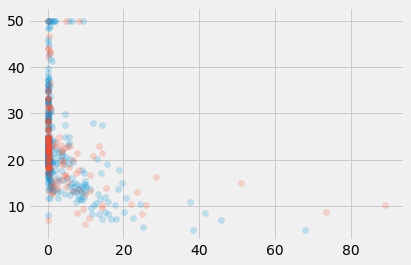

In [124]:
plt.scatter(X_train["CRIM"],y_train ,alpha=.2)
plt.scatter(X_test["CRIM"],y_test,alpha =.2)

In [125]:
model.score(X_test,y_test)

0.6511125951313353

# statistical for one variable

## mean and standard deviation and variance

In [126]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([80, 85, 82, 90, 89, 89, 80, 85, 86])
b = np.array([60, 100, 80, 85, 75, 90, 70, 74, 86, 90, 60])

In [127]:
a.mean(), b.mean()

(85.11111111111111, 79.0909090909091)

In [128]:
a.std(), b.std()

(3.603838831161523, 12.109009008732041)

In [129]:
marks = np.random.normal(80, 20, 1000)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  3.,  2.,  2.,  1.,  3.,  3.,  1.,  4.,  9., 11.,  4.,
         7.,  7., 14.,  8.,  9., 12., 11., 20., 19., 17., 16., 22., 20.,
        21., 21., 15., 22., 19., 16., 31., 21., 17., 34., 18., 28., 34.,
        30., 26., 21., 22., 27., 23., 19., 13., 24., 19., 23., 22., 16.,
        14., 16., 17., 21., 20., 10., 13.,  6.,  8.,  5., 10.,  2.,  6.,
         4.,  7.,  4.,  7.,  3.,  1.,  0.,  0.,  3.,  4.,  0.,  0.,  2.,
         1.,  2.,  0.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 12.07448077,  13.40824655,  14.74201234,  16.07577813,
         17.40954392,  18.74330971,  20.0770755 ,  21.41084129,
         22.74460707,  24.07837286,  25.41213865,  26.74590444,
         28.07967023,  29.41343602,  30.74720181,  32.08096759,
         33.41473338,  34.74849917,  36.08226496,  37.41603075,
         38.74979654,  40.08356233,  41.41732812,  42.7510939 ,
         44.08485969,  45.41862548,  46.75239127, 

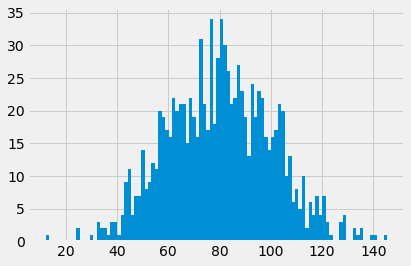

In [130]:
plt.hist(marks, bins=100)

In [131]:
marks[ (marks < 100) & (marks > 60) ].size

653

In [132]:
marks[ (marks < 120) & (marks > 40) ].size

956

In [133]:
marks[ (marks < 140) & (marks > 20) ].size

997

## linear regression

In [134]:
import pandas as pd

In [135]:
data = pd.read_csv("headbrain.csv")

In [136]:
data = data.drop(["Gender","Age Range"], axis=1)
data.sample(5)

,Head Size(cm^3),Brain Weight(grams)
4,4177,1590
49,3644,1300
67,3372,1154
134,2857,1027
204,3067,1150


In [137]:
data.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [138]:
data[["Head Size(cm^3)", "Brain Weight(grams)"]]

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
5,3585,1300
6,3785,1400
7,3559,1255
8,3613,1355
9,3982,1375


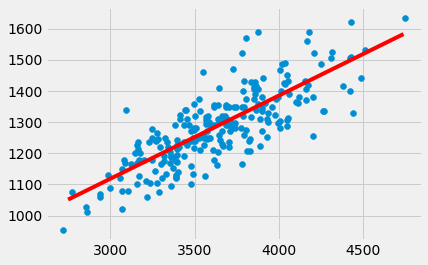

In [161]:
plt.scatter(data["Head Size(cm^3)"], data["Brain Weight(grams)"])
plt.plot( [2750, 4740], [model.predict( [[2750]] ), model.predict( [[4750]] )], c="red")

In [140]:
#seperate data into x and y
x, y = np.array(data["Head Size(cm^3)"]), np.array(data["Brain Weight(grams)"])

In [141]:
x = x.reshape(-1,1)

In [142]:
#deciding and importing our model|

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
model = LinearRegression()

In [145]:
#spliting our dataset into train and set

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [147]:
for i in x_train, x_test, y_train, y_test:
    print(i.shape)

(189, 1)
(48, 1)
(189,)
(48,)


In [148]:
list(zip(x_test, y_test))

[(array([3850], dtype=int64), 1412),
 (array([3648], dtype=int64), 1260),
 (array([3165], dtype=int64), 1215),
 (array([4253], dtype=int64), 1485),
 (array([3391], dtype=int64), 1120),
 (array([4442], dtype=int64), 1330),
 (array([3401], dtype=int64), 1140),
 (array([3505], dtype=int64), 1320),
 (array([4006], dtype=int64), 1302),
 (array([4012], dtype=int64), 1400),
 (array([4005], dtype=int64), 1280),
 (array([3572], dtype=int64), 1270),
 (array([3503], dtype=int64), 1240),
 (array([2773], dtype=int64), 1076),
 (array([3779], dtype=int64), 1165),
 (array([3497], dtype=int64), 1358),
 (array([3580], dtype=int64), 1320),
 (array([3454], dtype=int64), 1310),
 (array([3735], dtype=int64), 1350),
 (array([3793], dtype=int64), 1350),
 (array([3249], dtype=int64), 1279),
 (array([3090], dtype=int64), 1168),
 (array([3724], dtype=int64), 1280),
 (array([4158], dtype=int64), 1432),
 (array([3393], dtype=int64), 1175),
 (array([3782], dtype=int64), 1350),
 (array([3082], dtype=int64), 1180),
 

In [149]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
total_error = 0

for i, j in zip(x_test, y_test):
    
    total_error = total_error + abs(j - model.predict(i.reshape(1,-1)))
    
average_error = total_error/ y_test.shape[0]
average_error

array([55.55804093])

In [151]:
model.predict(x_train[10:20].reshape(-1,1))

array([1224.56593733, 1245.00156243, 1293.56934677, 1202.27252812,
       1175.73275526, 1295.42713087, 1360.98036984, 1356.73400618,
       1397.33985866, 1326.21326739])

In [152]:
for i, j in zip(x_test, y_test):
    print(i,":",j)

[3850] : 1412
[3648] : 1260
[3165] : 1215
[4253] : 1485
[3391] : 1120
[4442] : 1330
[3401] : 1140
[3505] : 1320
[4006] : 1302
[4012] : 1400
[4005] : 1280
[3572] : 1270
[3503] : 1240
[2773] : 1076
[3779] : 1165
[3497] : 1358
[3580] : 1320
[3454] : 1310
[3735] : 1350
[3793] : 1350
[3249] : 1279
[3090] : 1168
[3724] : 1280
[4158] : 1432
[3393] : 1175
[3782] : 1350
[3082] : 1180
[3556] : 1250
[3000] : 1090
[3277] : 1105
[3181] : 1175
[3399] : 1226
[3358] : 1190
[4121] : 1380
[4430] : 1620
[3891] : 1224
[3292] : 1075
[3439] : 1192
[3071] : 1078
[3930] : 1252
[3632] : 1163
[4308] : 1506
[3589] : 1250
[3582] : 1300
[3381] : 1185
[3492] : 1250
[3214] : 1110
[3878] : 1357


In [153]:
model.predict(x_test[0:5])

array([1343.46411975, 1289.85377857, 1161.66667565, 1450.41940438,
       1221.64656231])

In [154]:
y_test[0:5]

array([1412, 1260, 1215, 1485, 1120], dtype=int64)

In [155]:
model.predict( np.array([[4500]]))

array([1515.97264335])

In [156]:
a = [95, 69, 23, 45, 6, 8, 9, 34, 5, 69]
b = [34, 23, 56, 56, 47, 5, 7, 8, 9, 90]

a_train, a_test, b_train, b_test = train_test_split(a, b)

In [157]:
a_train, a_test, b_train, b_test

([6, 34, 95, 45, 69, 9, 69],
 [8, 23, 5],
 [47, 8, 34, 56, 90, 7, 23],
 [5, 56, 9])

In [158]:
a=2750-4750
b=model.predict( [[2750]] ) - model.predict( [[4750]] )

In [159]:
c=( model.predict( [[2750]] ) - model.predict( [[4750]] )/(2750-4750))
c

array([1052.31777931])

In [160]:
model.coef_

array([0.26539773])

## svm

In [162]:
import numpy as np
from matplotlib import pyplot as plt


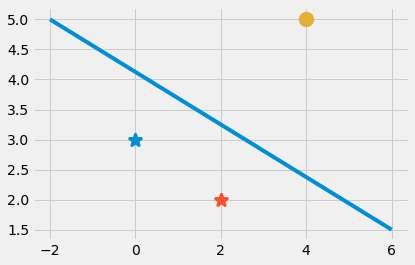

In [163]:
a = np.array([[0,3,-1],
              [2,2,-1],
              [2, 5, -1],
              [2, 4, -1],
              [4, 5, -1]
             ])
b = np.array([-1,-1,1,1,1])
for i, sample in enumerate(a):
    if i < 2:
        plt.scatter(sample[0], sample[1], s=150, marker='*', linewidths=3)
else:
        plt.scatter(sample[0], sample[1], s=150, marker='o', linewidths=3)
plt.plot([-2,6],[5,1.5])

##  PCM-principal componet analaysis

In [164]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [165]:
# Here we are using inbuilt dataset of scikit learn 
from sklearn.datasets import load_breast_cancer

In [166]:
# instantiating 
cancer = load_breast_cancer() 


In [167]:
# creating dataframe 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [168]:
# checking head of dataframe 
df.head() 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [169]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler()

In [170]:
# fitting 
scalar.fit(df) 
scaled_data = scalar.transform(df)

In [171]:
# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA(n_components = 2) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
x_pca.shape 


(569, 2)

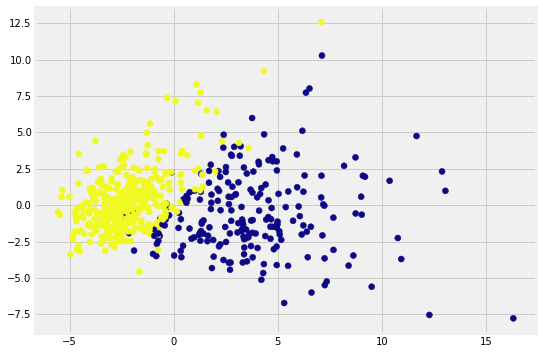

In [172]:
# giving a larger plot 
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma') 

Text(0,0.5,'Second Principal Component')

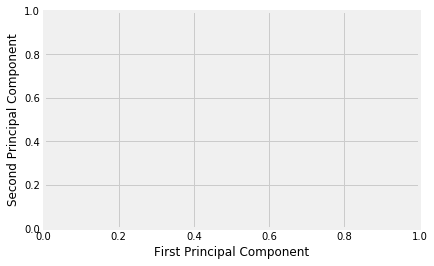

In [173]:
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 

In [174]:
# components 
pca.components_df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names']) 
  
plt.figure(figsize =(14, 6)) 


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

# Gradient Descent Method

C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??
200 epochs elapsed
Current accuracy is : 0.9876439126076564
Do you want to stop (y/*)??y


C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\Admin\Anaconda3\New folder (2)\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


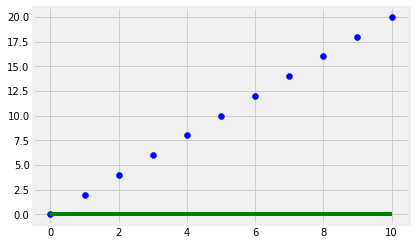

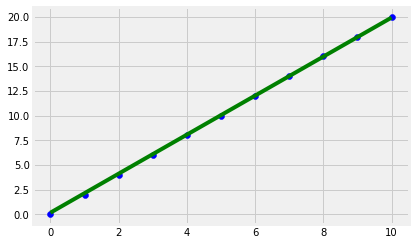

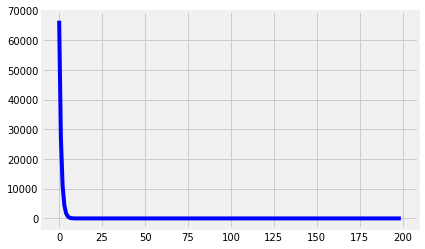

In [175]:
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]
        
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                  np.sum(Y_pred - Y)))
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                  np.sum((Y_pred - Y) * self.X)))
    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X: X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))
        return Y_pred
    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    #def predict(self, b, yi):
    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J
    def plot_best_fit(self, Y_pred, fig):
                f = plt.figure(fig)
                plt.scatter(self.X, self.Y, color='b')
                plt.plot(self.X, Y_pred, color='g')
                f.show()
def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])
    regressor = Linear_Regression(X, Y)
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []
    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)
        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                   regressor.get_current_accuracy(Y_pred))
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
    #final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')
    #plot to verify cost fuction decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()
    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])
if __name__ == '__main__':
    main()
